In [9]:
install.packages('ggplot2', repos="http://cran.rstudio.com/")
install.packages('data.table', repos="http://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/RtmpV77PkC/downloaded_packages’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘chron’




The downloaded source packages are in
	‘/tmp/RtmpV77PkC/downloaded_packages’


# Teahouse experiment analysis (v3)

In this notebook, we'll be looking for evidence that the Teahouse invitation affects retention of new editors. 

First, we'll load in the two datasets and merge them together.

In [20]:
library(data.table)
users = data.table(read.table("../datasets/th3_experimental_user.tsv", sep="\t", header=T))
survival = data.table(read.table("../datasets/th3_experimental_user_survival.tsv", sep="\t", header=T))
user_survival = merge(users, survival, by="user_id")
head(user_survival)

,user_id,invite_date,sample_group,revisions_3_to_4_weeks,revisions_1_to_2_months,revisions_2_to_6_months
1,26673158,2015-11-02,control,1,0,3
2,26673435,2015-11-02,control,0,0,0
3,26673452,2015-11-02,invited,0,1,0
4,26673898,2015-11-02,control,0,2,0
5,26674207,2015-11-02,invited,0,0,0
6,26674336,2015-11-02,invited,0,0,0


Next, we'll run our proportion test to see if a higher proportion of new editors survived in one condition or the other. 

In [26]:
user_survival$surviving_3_to_4_weeks = user_survival$revisions_3_to_4_weeks >= 1
user_survival$surviving_1_to_2_months = user_survival$revisions_1_to_2_months >= 1
user_survival$surviving_2_to_6_months = user_survival$revisions_2_to_6_months >= 1
head(user_survival)

,user_id,invite_date,sample_group,revisions_3_to_4_weeks,revisions_1_to_2_months,revisions_2_to_6_months,surviving_3_to_4_weeks,surviving_1_to_2_months,surviving_2_to_6_months
1,26673158,2015-11-02,control,1,0,3,TRUE,FALSE,TRUE
2,26673435,2015-11-02,control,0,0,0,FALSE,FALSE,FALSE
3,26673452,2015-11-02,invited,0,1,0,FALSE,TRUE,FALSE
4,26673898,2015-11-02,control,0,2,0,FALSE,TRUE,FALSE
5,26674207,2015-11-02,invited,0,0,0,FALSE,FALSE,FALSE
6,26674336,2015-11-02,invited,0,0,0,FALSE,FALSE,FALSE


In [39]:
prop.test(c(sum(user_survival[sample_group=="invited",]$surviving_3_to_4_weeks), 
            sum(user_survival[sample_group=="control",]$surviving_3_to_4_weeks)),
          c(length(user_survival[sample_group=="invited",]$user_id),
            length(user_survival[sample_group=="control",]$user_id)))


	2-sample test for equality of proportions with continuity correction

data:  c(sum(user_survival[sample_group == "invited", ]$surviving_3_to_4_weeks),  out of c(length(user_survival[sample_group == "invited", ]$user_id),     sum(user_survival[sample_group == "control", ]$surviving_3_to_4_weeks)) out of     length(user_survival[sample_group == "control", ]$user_id))
X-squared = 2.5855, df = 1, p-value = 0.1078
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.002458456  0.025407734
sample estimates:
    prop 1     prop 2 
0.09551070 0.08403606 


In [40]:
prop.test(c(sum(user_survival[sample_group=="invited",]$surviving_1_to_2_months), 
            sum(user_survival[sample_group=="control",]$surviving_1_to_2_months)),
          c(length(user_survival[sample_group=="invited",]$user_id),
            length(user_survival[sample_group=="control",]$user_id)))


	2-sample test for equality of proportions with continuity correction

data:  c(sum(user_survival[sample_group == "invited", ]$surviving_1_to_2_months),  out of c(length(user_survival[sample_group == "invited", ]$user_id),     sum(user_survival[sample_group == "control", ]$surviving_1_to_2_months)) out of     length(user_survival[sample_group == "control", ]$user_id))
X-squared = 1.4731, df = 1, p-value = 0.2249
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.005989449  0.026038614
sample estimates:
   prop 1    prop 2 
0.1289545 0.1189299 


In [41]:
prop.test(c(sum(user_survival[sample_group=="invited",]$surviving_2_to_6_months), 
            sum(user_survival[sample_group=="control",]$surviving_2_to_6_months)),
          c(length(user_survival[sample_group=="invited",]$user_id),
            length(user_survival[sample_group=="control",]$user_id)))


	2-sample test for equality of proportions with continuity correction

data:  c(sum(user_survival[sample_group == "invited", ]$surviving_2_to_6_months),  out of c(length(user_survival[sample_group == "invited", ]$user_id),     sum(user_survival[sample_group == "control", ]$surviving_2_to_6_months)) out of     length(user_survival[sample_group == "control", ]$user_id))
X-squared = 6.2337, df = 1, p-value = 0.01253
alternative hypothesis: two.sided
95 percent confidence interval:
 0.004195338 0.035542910
sample estimates:
   prop 1    prop 2 
0.1277493 0.1078802 


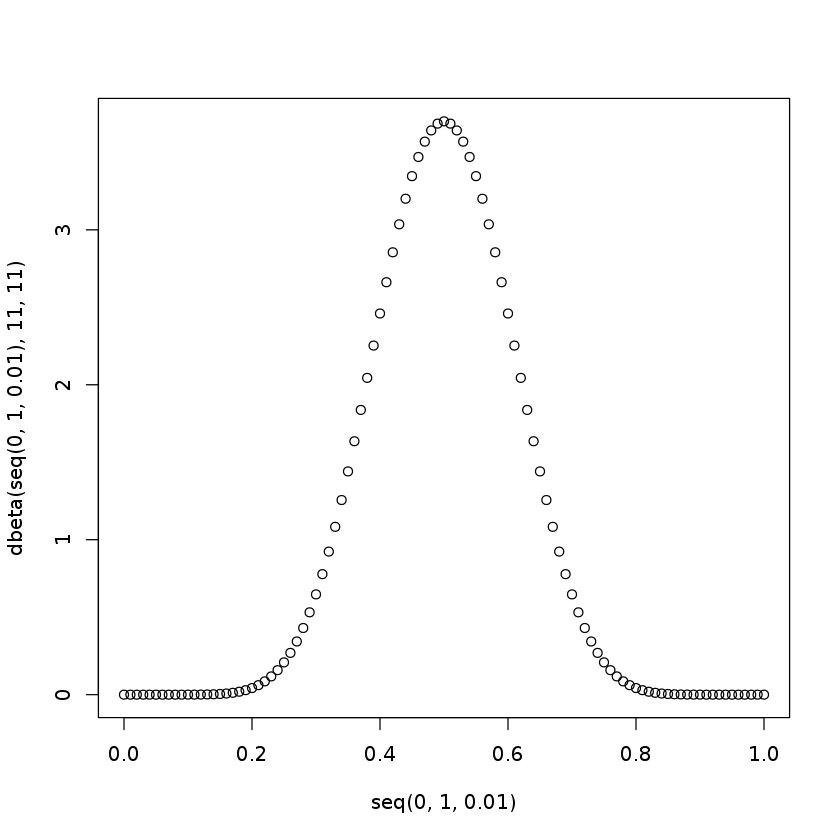

In [47]:
# 20 trials where 10 survive (11, 11)
plot(seq(0, 1, 0.01), dbeta(seq(0, 1, 0.01), 11, 11))

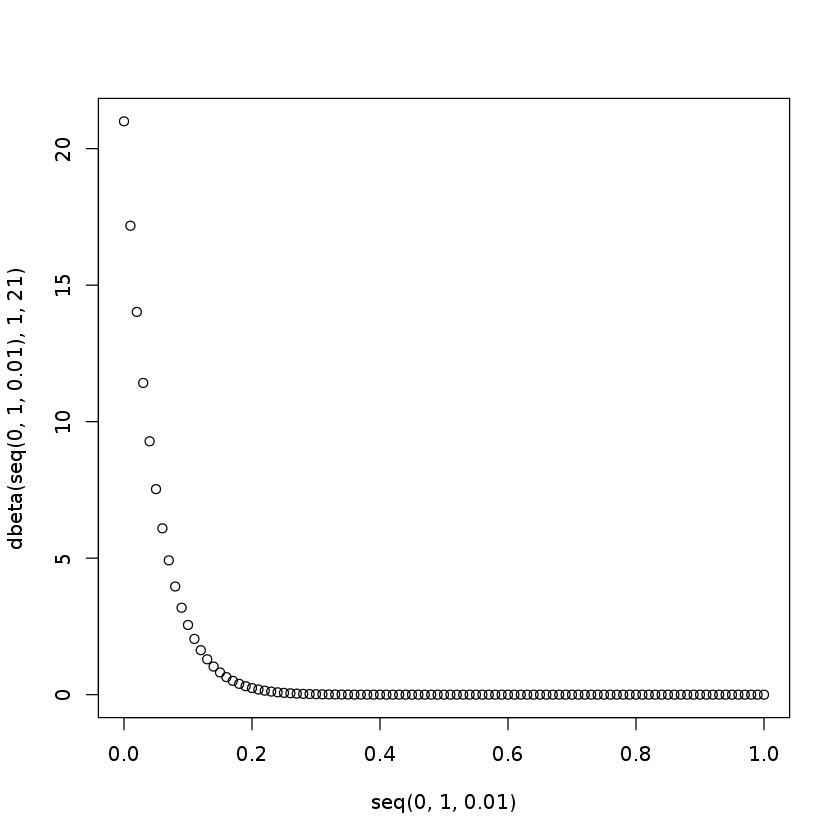

In [46]:
# 20 trials where 0 survive
plot(seq(0, 1, 0.01), dbeta(seq(0, 1, 0.01), 1, 21))

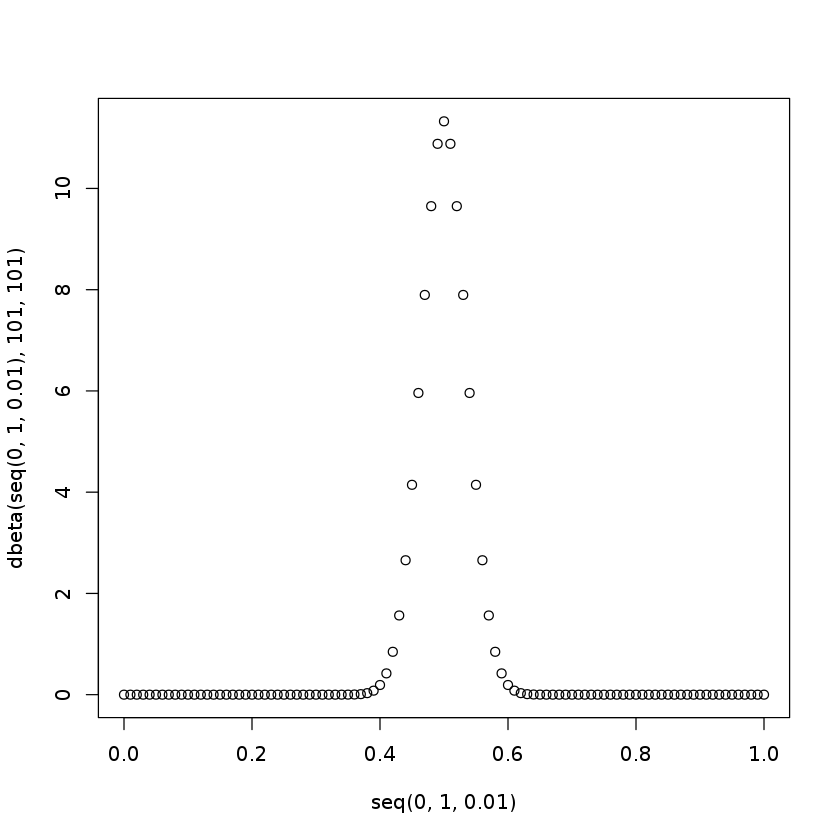

In [48]:
# 200 trials where 100 survive (101, 101)
plot(seq(0, 1, 0.01), dbeta(seq(0, 1, 0.01), 101, 101))